In [3]:
import tensorflow as tf
import keras as ks 
import pandas as pd
import sklearn
import matplotlib

In [4]:
df=pd.read_csv('housepricedata.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'housepricedata.csv'

In [6]:
import os

In [7]:
os.getcwd()

'C:\\Users\\lENOVO'

In [8]:
df=pd.read_csv("housepricedata.csv")

In [9]:
df.head()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1


In [10]:
data=df.values

In [11]:
data

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]], dtype=int64)

In [12]:
#we convert dataset into array format for machine to process the data

In [14]:
x=data[:,0:10] # all rows and 9 columns index starts from 0
y=data[:,10]#last column is stored in Y last is the price which we are predicting

In [16]:
from sklearn import preprocessing
min_max_scaler=preprocessing.MinMaxScaler()
x_scale=min_max_scaler.fit_transform(x)

In [17]:
x_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [19]:
from sklearn.model_selection import train_test_split


In [21]:
x_train,x_valandtest,y_train,y_valandtest=train_test_split(x_scale,y,test_size=0.3)

In [22]:
x_val,x_test,y_val,y_test=train_test_split(x_valandtest,y_valandtest,test_size=0.5)

In [24]:
print(x_train.shape, x_val.shape, x_test.shape, y_train.shape, y_val.shape, y_test.shape)


(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [29]:
from keras.models import Sequential

In [28]:
from keras.layers import Dense

In [30]:
model=Sequential([
    Dense(32,activation='relu',input_shape=(10,)),
    Dense(32,activation='relu'),
    Dense(1,activation='sigmoid'),
])

In [31]:
model.compile(optimizer='sgd',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [37]:
hist=model.fit(x_train,y_train,
              batch_size=32,epochs=100,
              validation_data=(x_val,y_val))

Epoch 1/100
32/32 [==============================] - 0s 6ms/step - loss: 0.2892 - accuracy: 0.8875 - val_loss: 0.2662 - val_accuracy: 0.8858
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.2881 - accuracy: 0.8875 - val_loss: 0.2660 - val_accuracy: 0.8858
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.2878 - accuracy: 0.8885 - val_loss: 0.2651 - val_accuracy: 0.8858
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.2866 - accuracy: 0.8875 - val_loss: 0.2646 - val_accuracy: 0.8858
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.2868 - accuracy: 0.8855 - val_loss: 0.2639 - val_accuracy: 0.8858
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.2855 - accuracy: 0.8885 - val_loss: 0.2634 - val_accuracy: 0.8858
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.2849 - accuracy: 0.8885 - val_loss: 0.2629 - val_accuracy: 0.8813
Epoch 8/100
3

In [39]:
model.evaluate(x_test,y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.3145 - accuracy: 0.8630


[0.3144928514957428, 0.8630136847496033]

In [38]:
model.evaluate(x_test,y_test)[1]

7/7 [==============================] - 0s 3ms/step - loss: 0.3145 - accuracy: 0.8630


0.8630136847496033

In [40]:
import matplotlib.pyplot as plt

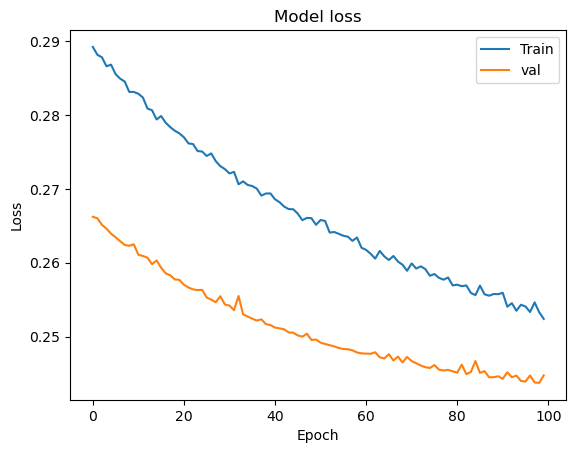

In [42]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','val'],loc='upper right')
plt.show()



<function matplotlib.pyplot.show(close=None, block=None)>

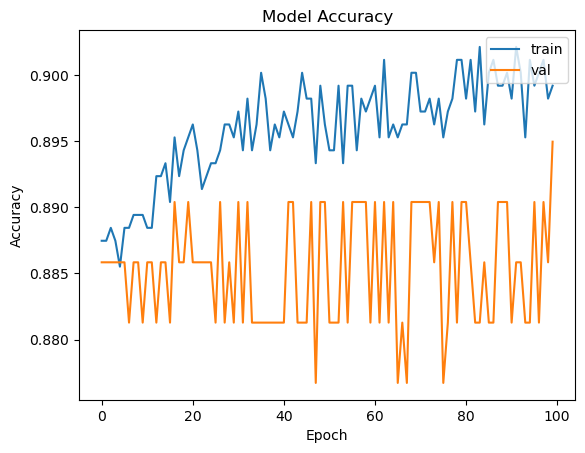

In [47]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','val'],loc='upper right')
plt.show


In [48]:
#above neural nwtwork is not overfitting as the training and validation are almoat similar 

In [49]:
# now we will create an other neural network wich will overfitt for sure 
# this will happen by takking 100 neurons in dense layer and using adam optimizer

In [52]:
model_2= Sequential([
    
    Dense(1000,activation='relu',input_shape=(10,)),
    Dense(1000,activation='relu'),
    Dense(1000,activation='relu'),
    Dense(1000,activation='relu'),
    Dense(1,activation='sigmoid'),
])


In [55]:
model_2.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])

hist_2=model_2.fit(x_train,y_train,
                   batch_size=32,epochs=100,
                   validation_data=(x_val,y_val))

Epoch 1/100
32/32 [==============================] - 3s 51ms/step - loss: 0.4537 - accuracy: 0.8004 - val_loss: 0.3244 - val_accuracy: 0.8493
Epoch 2/100
32/32 [==============================] - 1s 29ms/step - loss: 0.3423 - accuracy: 0.8738 - val_loss: 0.3379 - val_accuracy: 0.8447
Epoch 3/100
32/32 [==============================] - 1s 31ms/step - loss: 0.3289 - accuracy: 0.8659 - val_loss: 0.2794 - val_accuracy: 0.8767
Epoch 4/100
32/32 [==============================] - 1s 38ms/step - loss: 0.2737 - accuracy: 0.8933 - val_loss: 0.2649 - val_accuracy: 0.8950
Epoch 5/100
32/32 [==============================] - 1s 35ms/step - loss: 0.3050 - accuracy: 0.8728 - val_loss: 0.2907 - val_accuracy: 0.8950
Epoch 6/100
32/32 [==============================] - 1s 31ms/step - loss: 0.3010 - accuracy: 0.8924 - val_loss: 0.2610 - val_accuracy: 0.8995
Epoch 7/100
32/32 [==============================] - 1s 30ms/step - loss: 0.2529 - accuracy: 0.8885 - val_loss: 0.2538 - val_accuracy: 0.8995
Epoch 

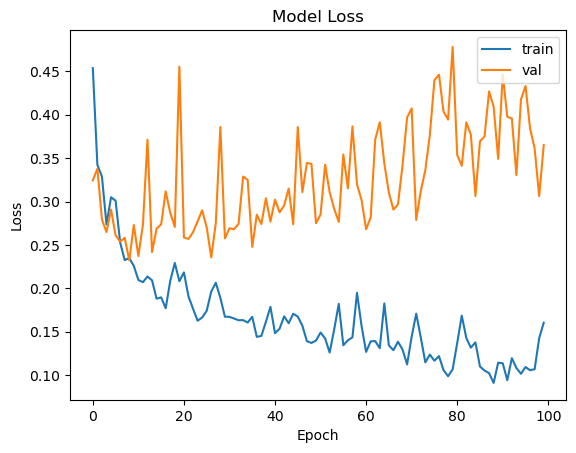

In [56]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','val'],loc='upper right')
plt.show()


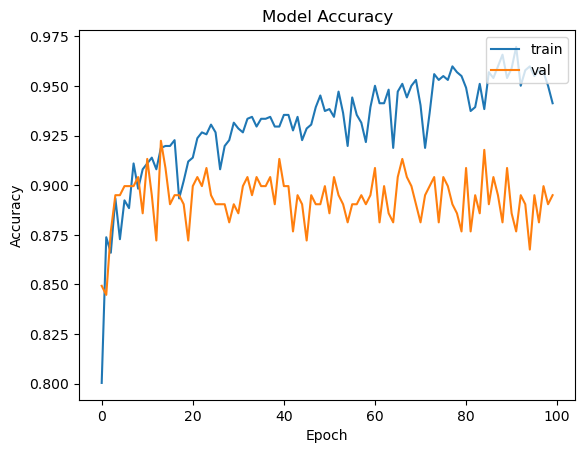

In [58]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','val'],loc='upper right')
plt.show()

In [59]:
#regulirization process

In [60]:
from keras.layers import Dropout
from keras import regularizers

In [63]:
model_3=Sequential([
    Dense(1000,activation='relu',kernel_regularizer=regularizers.l2(0.01),input_shape=(10,)),
    Dropout(0.3),
    Dense(1000,activation='relu',kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000,activation='relu',kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000,activation='relu',kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1,activation='sigmoid',kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
])

In [66]:
model_3.compile(optimizer='adam',
               loss='binary_crossentropy',
               metrics=['accuracy'])

hist_3=model.fit(x_train,y_train,
                batch_size=32,epochs=100,
                validation_data=(x_val,y_val))

Epoch 1/100
32/32 [==============================] - 0s 13ms/step - loss: 0.2533 - accuracy: 0.9002 - val_loss: 0.2440 - val_accuracy: 0.8858
Epoch 2/100
32/32 [==============================] - 0s 8ms/step - loss: 0.2531 - accuracy: 0.8982 - val_loss: 0.2438 - val_accuracy: 0.8858
Epoch 3/100
32/32 [==============================] - 0s 8ms/step - loss: 0.2529 - accuracy: 0.8992 - val_loss: 0.2436 - val_accuracy: 0.8858
Epoch 4/100
32/32 [==============================] - 0s 8ms/step - loss: 0.2533 - accuracy: 0.8982 - val_loss: 0.2436 - val_accuracy: 0.8858
Epoch 5/100
32/32 [==============================] - 0s 8ms/step - loss: 0.2524 - accuracy: 0.9022 - val_loss: 0.2435 - val_accuracy: 0.8858
Epoch 6/100
32/32 [==============================] - 0s 8ms/step - loss: 0.2529 - accuracy: 0.8963 - val_loss: 0.2437 - val_accuracy: 0.8858
Epoch 7/100
32/32 [==============================] - 0s 8ms/step - loss: 0.2532 - accuracy: 0.9012 - val_loss: 0.2433 - val_accuracy: 0.8950
Epoch 8/100


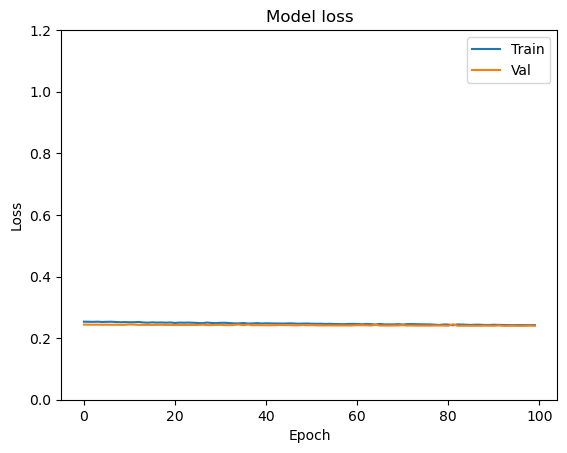

In [69]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

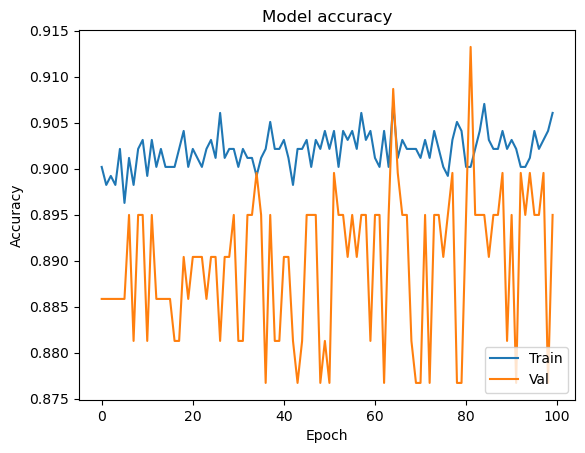

In [71]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()